In [1]:
import torch
import numpy as np
import sys
from pathlib import Path
project_root = Path('..').resolve() 
sys.path.append(str(project_root))
from graphIO.math import compute_intrahemispherical_asymmetry, compute_interhemispherical_asymmetry, perform_statistical_analysis
from graphIO.visual import plot_asymmetry_comparison

In [2]:
eFC = torch.load('../data/adni_efc.pth')
eFC_matrices = eFC['eFC_matrices']
eFC_labels = eFC['labels']
print(f'eFC_matrics shape: {eFC_matrices.shape}')
print(f'eFC_labels shape: {eFC_labels.shape}')

eFC_matrics shape: torch.Size([250, 116, 116])
eFC_labels shape: torch.Size([250])


In [3]:
eFC_controls = eFC_matrices[eFC_labels == 0].cpu().numpy()
eFC_patients = eFC_matrices[eFC_labels != 0].cpu().numpy()
print(f'eFC_control shape: {eFC_controls.shape}')
print(f'eFC_patient shape: {eFC_patients.shape}')

eFC_control shape: (177, 116, 116)
eFC_patient shape: (73, 116, 116)


In [4]:
# Example for AAL116 atlas (58 regions per hemisphere)
num_regions = 116
left_hemisphere_indices = np.arange(0, num_regions, 2)
right_hemisphere_indices = np.arange(1, num_regions, 2)

In [5]:
# Calculate asymmetry for patients and controls
inter_abs_asymmetry_patients = np.array([compute_interhemispherical_asymmetry(eFC, method='absolute') for eFC in eFC_patients])
inter_idx_asymmetry_patients = np.array([compute_interhemispherical_asymmetry(eFC, method='index') for eFC in eFC_patients])
inter_abs_asymmetry_controls = np.array([compute_interhemispherical_asymmetry(eFC, method='absolute') for eFC in eFC_controls])
inter_idx_asymmetry_controls = np.array([compute_interhemispherical_asymmetry(eFC, method='index') for eFC in eFC_controls])
intra_abs_asymmetry_patients = np.array([compute_intrahemispherical_asymmetry(eFC, method='absolute') for eFC in eFC_patients])
intra_idx_asymmetry_patients = np.array([compute_intrahemispherical_asymmetry(eFC, method='index') for eFC in eFC_patients])
intra_abs_asymmetry_controls = np.array([compute_intrahemispherical_asymmetry(eFC, method='absolute') for eFC in eFC_controls])
intra_idx_asymmetry_controls = np.array([compute_intrahemispherical_asymmetry(eFC, method='index') for eFC in eFC_controls])

In [6]:
# Perform analysis for all pairs
results = {}
threshold = 0.01

# Interhemispherical Absolute
results['inter_abs'] = perform_statistical_analysis(inter_abs_asymmetry_patients, inter_abs_asymmetry_controls, threshold)
# Interhemispherical Index
results['inter_idx'] = perform_statistical_analysis(inter_idx_asymmetry_patients, inter_idx_asymmetry_controls, threshold)
# Intrahemispherical Absolute
results['intra_abs'] = perform_statistical_analysis(intra_abs_asymmetry_patients, intra_abs_asymmetry_controls, threshold)
# Intrahemispherical Index
results['intra_idx'] = perform_statistical_analysis(intra_idx_asymmetry_patients, intra_idx_asymmetry_controls, threshold)

print("Statistical analysis completed.")

Statistical analysis completed.


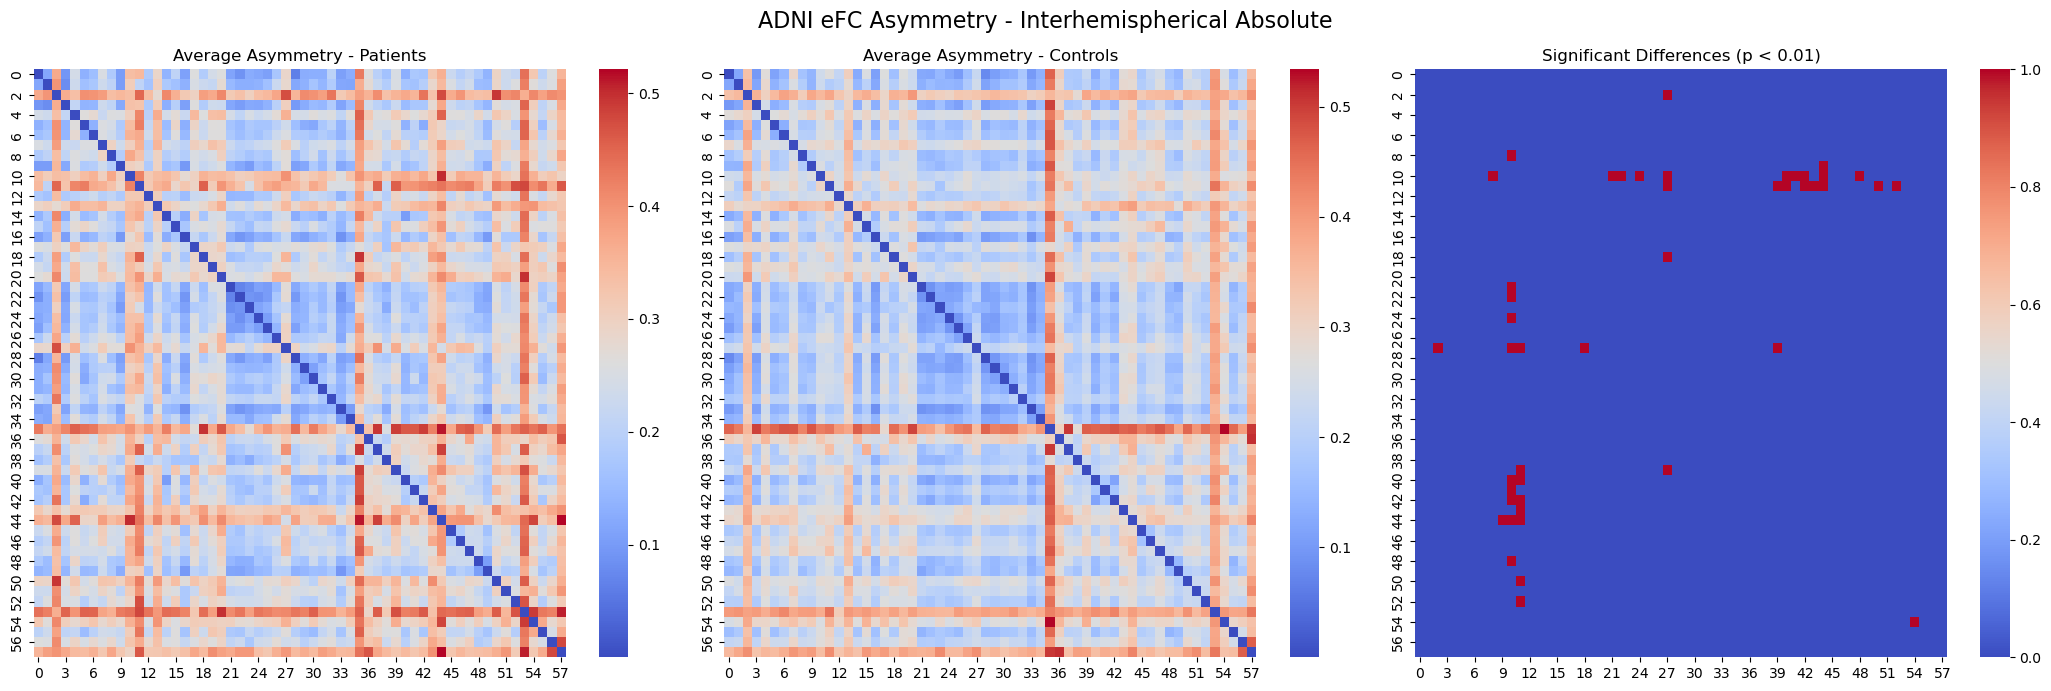

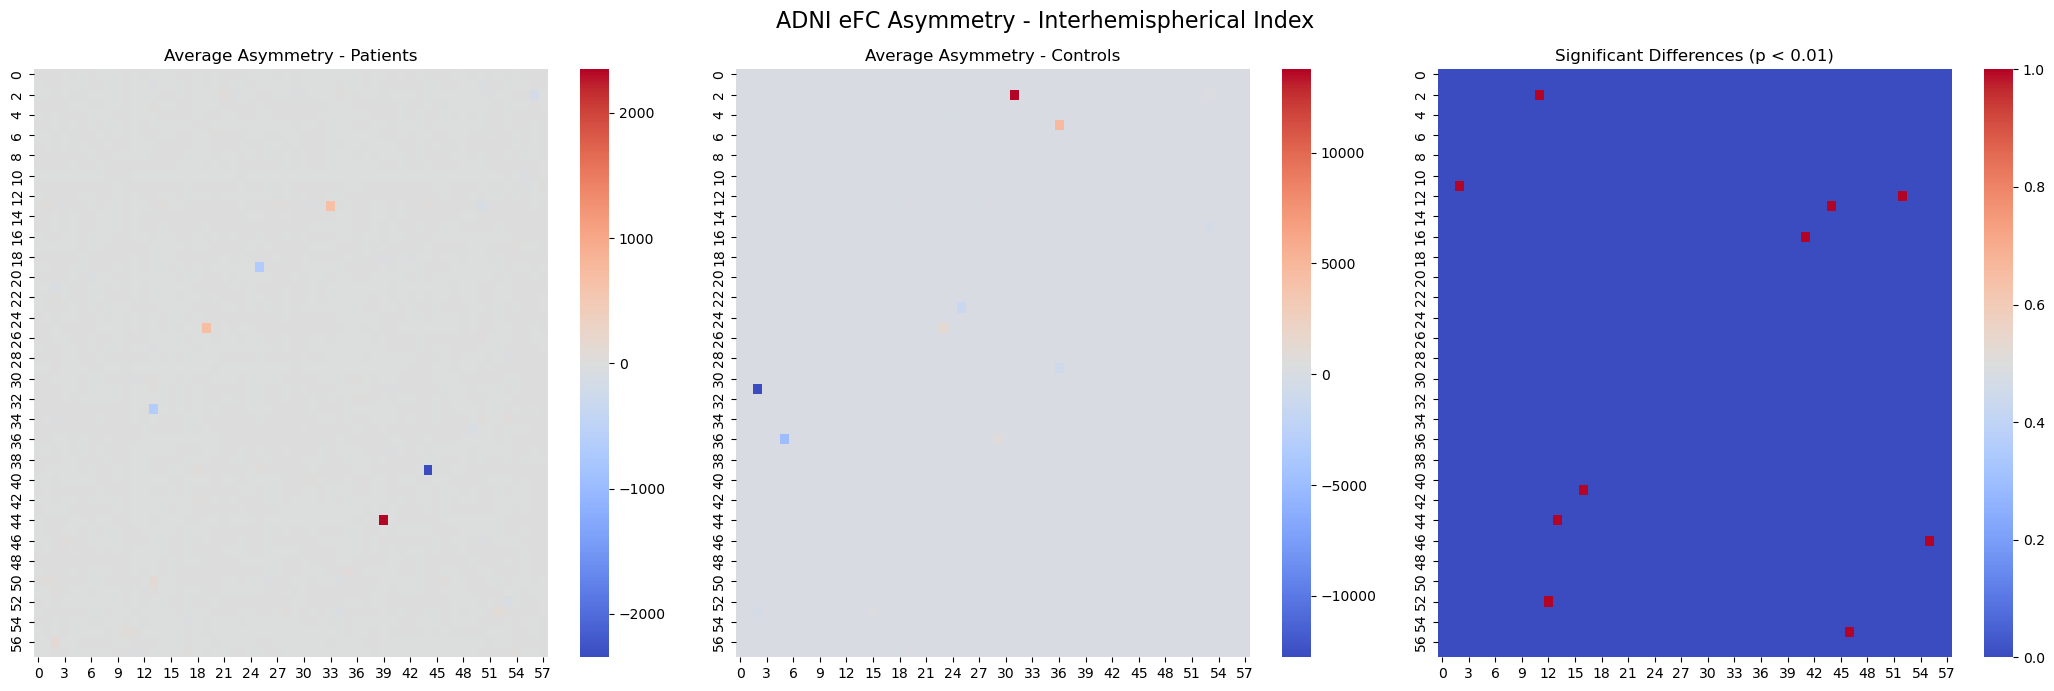

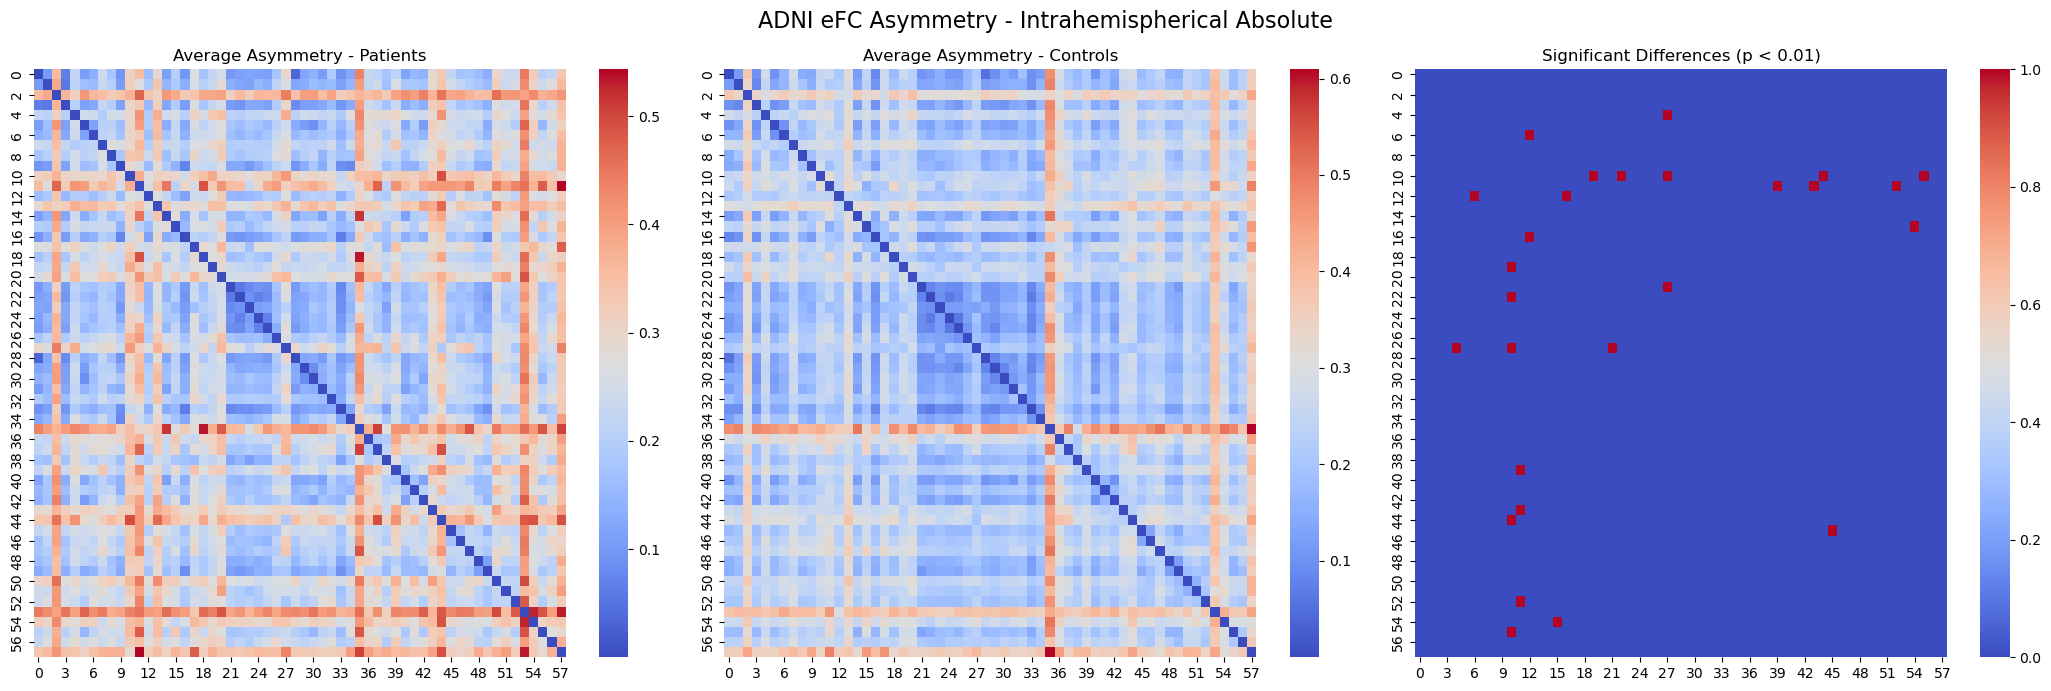

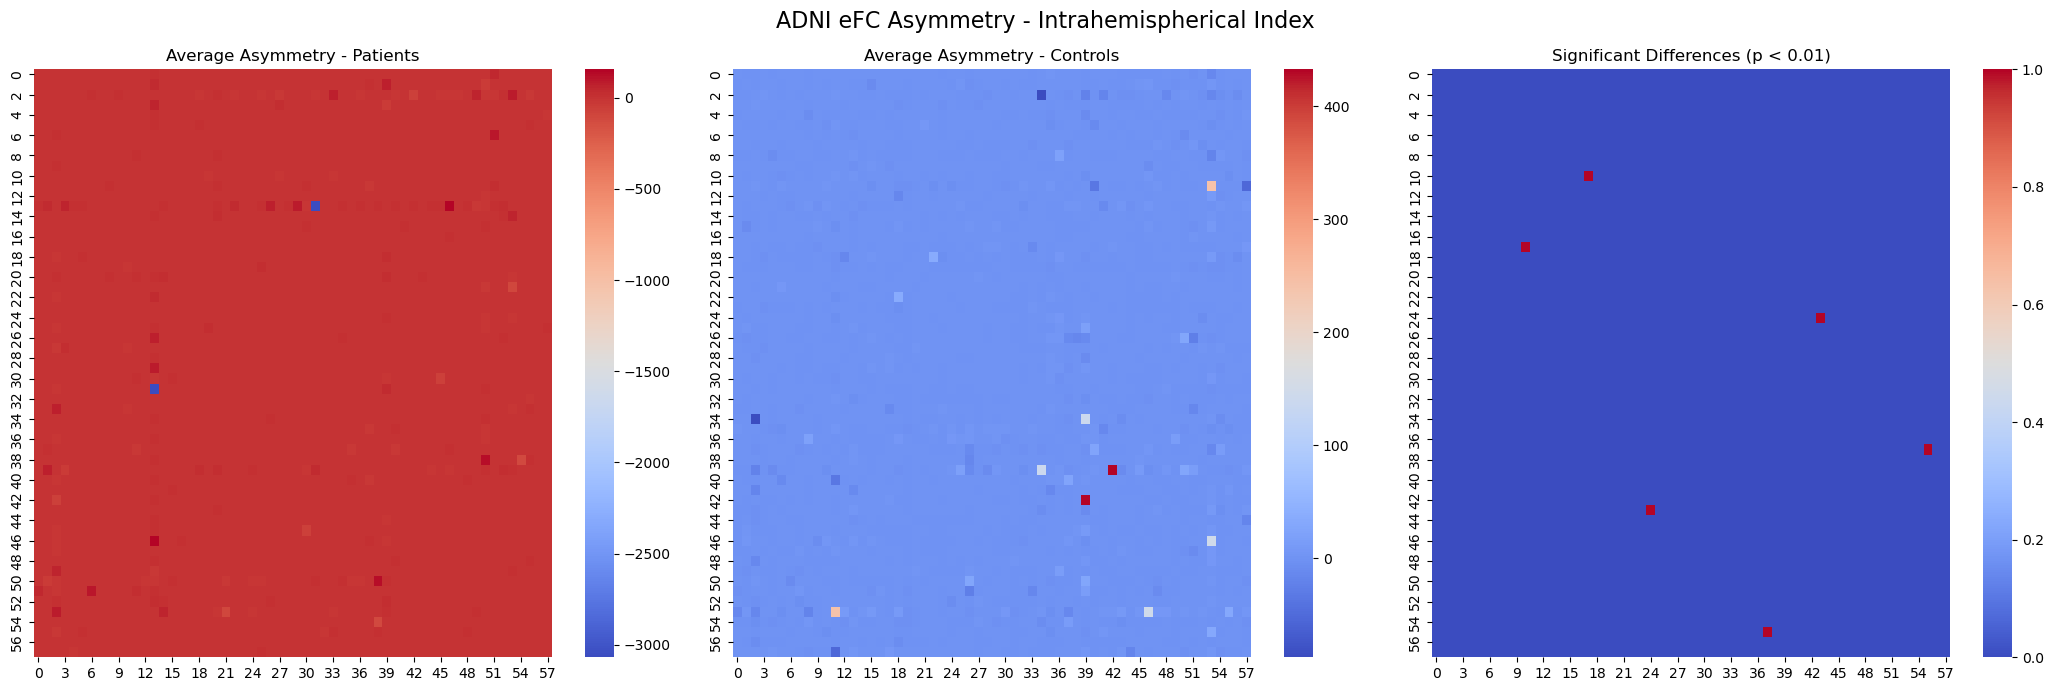

In [7]:
# Define left and right hemisphere indices
left_hemisphere_indices = np.arange(0, 116, 2)
right_hemisphere_indices = np.arange(1, 116, 2)

# Plot for each pair
plot_asymmetry_comparison(inter_abs_asymmetry_patients, inter_abs_asymmetry_controls, results['inter_abs'][2], 'Interhemispherical Absolute', left_hemisphere_indices, right_hemisphere_indices, dataset='ADNI', threshold=threshold)
plot_asymmetry_comparison(inter_idx_asymmetry_patients, inter_idx_asymmetry_controls, results['inter_idx'][2], 'Interhemispherical Index', left_hemisphere_indices, right_hemisphere_indices, dataset='ADNI', threshold=threshold)
plot_asymmetry_comparison(intra_abs_asymmetry_patients, intra_abs_asymmetry_controls, results['intra_abs'][2], 'Intrahemispherical Absolute', left_hemisphere_indices, right_hemisphere_indices, dataset='ADNI', threshold=threshold)
plot_asymmetry_comparison(intra_idx_asymmetry_patients, intra_idx_asymmetry_controls, results['intra_idx'][2], 'Intrahemispherical Index', left_hemisphere_indices, right_hemisphere_indices, dataset='ADNI', threshold=threshold)